# Practice Lab: Data Cleaning in Python

In this practice lab, we will explore common data cleaning tasks such as handling missing values, outliers, duplicates, and inconsistent data.

To run the labs, you will need two things:

* An installation of `Python3`, which is the specific version of `Python`  used in the labs.
* Access to  `Jupyter`, a very popular `Python` interface that runs code through a file called a *notebook*.

You can download and install  `Python3`   by following the instructions available at [anaconda.com/anaconda-navigator](https://www.anaconda.com/anaconda-navigator).

 There are a number of ways to get access to `Jupyter`. Here are just a few:

 * Using `Anaconda`, available at [anaconda.com/download](https://www.anaconda.com/download).
 * Using Google's `Colaboratory` service: [colab.research.google.com/](https://colab.research.google.com/).
 * Using `JupyterHub`, available at [jupyter.org/hub](https://jupyter.org/hub).
 * Using your own `jupyter` installation. Installation instructions are available at [jupyter.org/install](https://jupyter.org/install).

 For more resources about `Python` in general, you may want to consult the tutorial at [docs.python.org/3/tutorial/](https://docs.python.org/3/tutorial/).


## Data Types and Formats
In this practice lab, we will be working with CSV (Comma-Separated Values) data format.
- We'll explore both numerical and categorical data types.
## Sources of Data for AI
Datasets are available for free use from sources like
- [Kaggle](https://www.kaggle.com/datasets)
- [OpenML](https://www.openml.org)
- [Github](https://github.com/search?q=datasets&type=repositories)

### 1. Import Libraries
- By importing the `pandas` library with the alias pd, you can use its functionalities for data manipulation and analysis.
- By importing `matplotlib.pyplot` as `plt`, you now have access to a powerful visualization library in Python. `matplotlib` is widely used for creating various types of plots and charts, allowing you to visualize your data effectively.

In [2]:
#import pandas for data manipulation and analysis
import pandas as pd

#import matplotlib.pyplot for visulaization
import matplotlib.pyplot as plt


For more resources about `Pandas` in general, check out [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html). In general,
- Pandas in Python is a powerful, open-source data analysis and manipulation tool.
- Pandas provides data structures and functions designed to make data analysis fast and easy in Python.

##### Graphics
In `Python`, common practice is to use  the library `matplotlib` for graphics.

For many more examples of how to make plots in `Python`, readers are encouraged to visit [matplotlib.org/stable/gallery/](https://matplotlib.org/stable/gallery/index.html).

In `matplotlib`, a plot consists of a *figure* and one or more *axes*. You can think of the figure as the blank canvas upon which one or more plots will be displayed: it is the entire plotting window.
The *axes* contain important information about each plot, such as its $x$- and $y$-axis labels,
title,  and more. (Note that in `matplotlib`, the word *axes* is not the plural of *axis*: a plot's *axes* contains much more information than just the $x$-axis and  the $y$-axis.)

### 2. Load the Dataset
Data sets often comprise various types of data and may include labels associated with the rows or columns. To manage such data effectively, we commonly use a data structure known as a *data frame*.
- Think of a data frame as a table where each column is like an array of data, and rows combine entries from these arrays.
- The `Pandas` library introduced earlier provides robust tools for creating, manipulating, and analyzing data frame objects, making it an essential tool in data science and analysis workflows.

The first step of most analyses involves importing a data set into `Python`.
Before attempting to load a data set, we must make sure that Python knows where to find the file containing it. If the file is in the same location as this notebook file, then we are all set.

The dataset we will be working on is the "Titanic" dataset from [Kaggle](https://www.kaggle.com/c/titanic/data). It contains information about passengers on the Titanic, including their survival status, gender, age, class, and other relevant features.

We will begin by reading in `.csv`, available in a folder with my notebook file. This is a comma-separated file, and can be read in using `pd.read_csv()`:

In [5]:

df = pd.read_csv('/content/train.csv')

### 3. Explore the Dataset
#### Display basic information about the dataset

In [6]:
# Shape of the dataset
print('shape of the dataset:', df.shape)

shape of the dataset: (891, 12)


The `df.shape` attribute tells us that the data has 891  observations, or rows, and 12 variables, or columns.

In [7]:
# Columns names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

The `df.columns` attribute gives us the names of the variables (columns).

In [8]:
#overview of the dataset
# df.head(5)
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


The `df.head()` gives an overview of the dataset.

In [9]:
# Summary of the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The `df.info()` is used to get a concise summary of the DataFrame. It provides information about the DataFrame's index, column data types, non-null values, and memory usage

#### Data Dictionary
- survival: Survival (0 = No, 1 = Yes)
- pclass: Ticket class (1st = Upper, 2nd = Middle, 3rd = Lower)
- sex: Sex (Female or Male)
- Age: Age in years
- sibsp: # of siblings / spouses aboard the Titanic
- parch: # of parents / children aboard the Titanic
- ticket: Ticket number
- fare: Passenger fare
- cabin: Cabin number
- embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

#### Tasks:
What are the data types for each feature? Is it int (integer), float, or string?

Survived: int64

Pclass: int64

Name: _

Sex: _

Age: _

SibSp: _

Parch: _

Ticket: _

Fare: _

Cabin: _

Embarked: _



Can you identify and classify the columns (features) that are
1. Categorical features : Ordinal or Nominal
2. Numerical features : Discrete or Continuous

| Column Name   | Data Type    | Classification   |
|---------------|--------------|------------------|
| Survived      | Categorical  |     Nominal      |
| Pclass        |  Categorical            |  Nomininal                |
| Sex           |     Categorical         | Ordinal                 |
| Age           |   Numerical           |        Continuous          |
| SibSp         |   Numerical           |       Discrete           |
| Parch         |  Categorical            |  Discrete                |
| Fare          |    Numerical          |         Continuous         |
| Embarked      |    Categorical          |       Nominal           |


The `.describe()` provides summary statistics of numerical columns in the DataFrame. It calculates statistics such as count, mean, standard deviation, minimum, maximum, and quartile values for each numerical column.

In [10]:
# Calling describe on the numeric features
#describe() shows the numerical data and sets them apart from the categorical data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Task:
Based on the table above, can you identify any columns that were mismatched?

survived

### 4. Data Cleaning

#### Create a copy of dataframe


In [ ]:
# Make a copy
data = df.copy()

### a. Handling Missing Values
#### Identify missing values

We want to know the number of missing values per column in a DataFrame.

In [ ]:
# Check for missing values
print("missing values: ")
data.isnull()

missing values: 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Check for missing values per columns
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Strategies for Handling Missing Values
1. Remove Rows or Columns: If the number of missing values is small compared to the total size of the dataset.
2. Imputation: Replace missing values with a suitable value such as mean, median, or mode.
The choice between using the mean, median, or mode for imputation depends on the nature of the data and the specific context of the analysis.

In [ ]:
# 1. Removing rows with any missing values
#data.dropna(inplace = True)
#this method only works if there's a lot of data and cutting out some wouldn't cause any losses


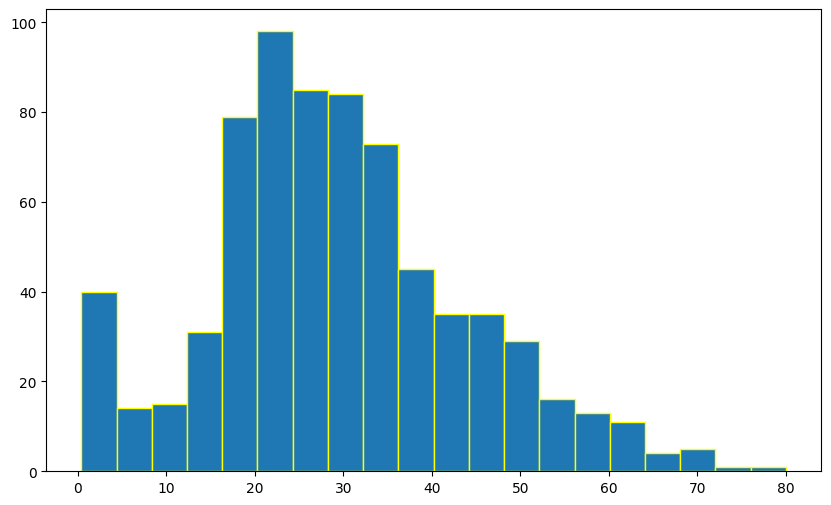

In [ ]:
# 2. Imputation
# a. Visualize the column
# Create a histogram for the 'Age' column
#figure creates a blank canvas for the plot
plt.figure(figsize=(10,6))
plt.hist(data['Age'], bins=20, edgecolor='yellow')
plt.show()


- Use mean imputation for numerical variables with a symmetric distribution and no extreme outliers.
- Use median imputation for numerical variables with skewed distributions or in the presence of outliers.
- Use mode imputation for categorical variables or numerical variables that represent categories.

In [ ]:
# 2. Imputation
# b. Replace with suitable value
median = data['Age'].median()

#mean can be used instead of medium in this scenario

data['Age'] = data['Age'].fillna(median)

Since Cabin has more than 50% of null data, we will simply drop it as any kind of missing data imputation will introduce bias in the column.

In [ ]:
# Droping Cabin Column
data.drop('Cabin', axis=1, inplace= True)

### Task
Handle the missing values for the coloumn `Embarked`.
- What strategy would you use?

imputation would be most efficient since dropping the 2 columns might affect the model being designed.

### b. Handling Outliers
Outliers are data points that significantly differ from other observations in the dataset.

In [ ]:
# Overview of numerical variables
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Visualize outliers
Visualization techniques to identify outliers in the dataset:
- Box plots: Identify observations that fall outside the whiskers.

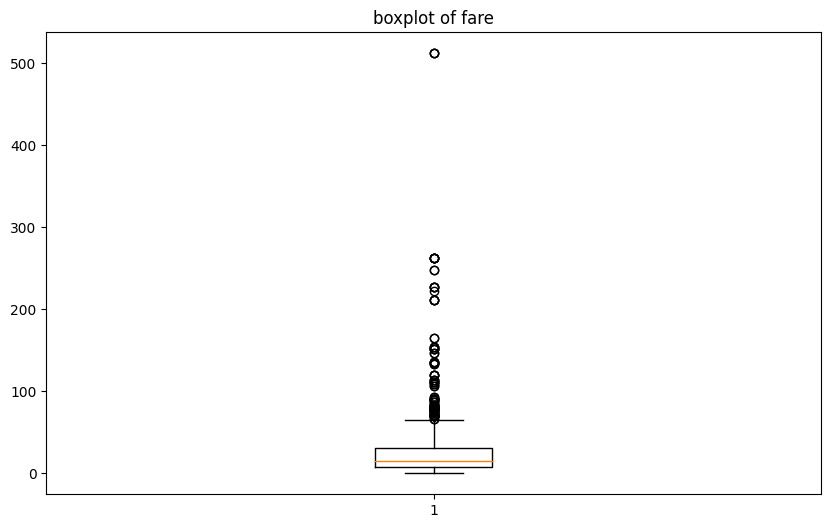

In [ ]:
# Visualize distribution of a numerical variable 'Fare'
plt.figure(figsize=(10,6))
plt.boxplot(data['Fare'])

plt.title("boxplot of fare")
plt.show()

<Axes: xlabel='Fare'>

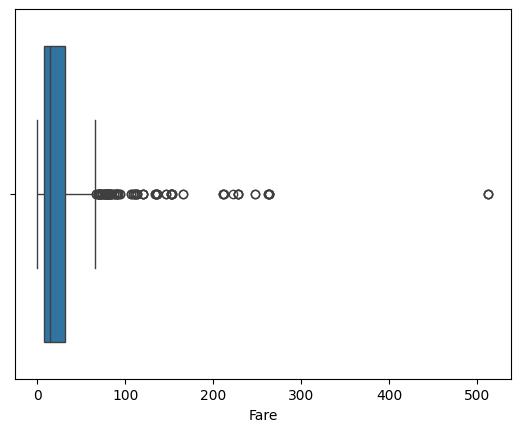

In [ ]:
# Visualize distribution of a numerical variable using seaborn
#it's another way to visualize outliers

import seaborn as sns

sns.boxplot(x = data['Fare'])


`Seaborn` is a popular data visualization library in Python that is built on top of Matplotlib and provides a high-level interface for creating attractive statistical graphics. To learn more you can read [Seaborn Official Tutorial](https://seaborn.pydata.org/tutorial.html), or [Python Seaborn Tutorial](https://elitedatascience.com/python-seaborn-tutorial).

### Strategies for Handling Outliers
Decide on a threshold or criteria for identifying outliers. This could be based on domain knowledge, statistical methods, or a combination of both.

- Removing Outliers: If the outliers are due to data entry errors or measurement errors.
- Transformation: Apply mathematical transformations such as log transformation to make the distribution more normal.
- Winsorization: Replace extreme values with less extreme values.


In [ ]:
# Identify outliers based on a threshold (e.g., values greater than 500)
threshold = 500
outliers = data["Fare"]>500
outliers


0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool

In [ ]:
# Remove rows containing outliers
data = data[~outliers]

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,0.381757,2.313063,29.341408,0.524775,0.381757,30.582164
std,257.405474,0.486091,0.834007,13.037026,1.104186,0.806949,41.176366
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,445.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.250000,1.000000,3.000000,35.000000,1.000000,0.000000,30.771850
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,263.000000


There are other ways to handle outliers especially using statistical methods like:
- Z-score: Calculate the Z-score for each observation and consider observations with a Z-score above a certain threshold as outliers.
- Interquartile range (IQR): Calculate the IQR for each numerical variable and consider observations outside a certain range (e.g., 1.5 * IQR) as outliers.

### c. Handling Duplicates
#### Identify and remove duplicates

In [ ]:
# Identify duplicates if any
data.duplicated().sum()

0

In [1]:
# Remove duplicates
data.to_csv('clean.csv')

NameError: name 'data' is not defined

### d. Handling Inconsistent Data
Inconsistent data happens when the same info is shown differently in the dataset. It's important to make data consistent for accurate analysis. For example:
- Check the dataset for mistakes, like typos or different formats.
- Find out why there are inconsistencies, like human errors or problems with data collection.
- Set standard formats for the data, such as using YYYY/MM/DD for dates and 24-hour clock for times.

#### Identification of Errors: Datatypes
When working with new data, you should always check the data types of your columns by using the `.dtypes` attribute or the `.info()` method.

Steps on identifying errors in data types:
1. Check Data Types: Utilize the `.dtypes` attribute of a DataFrame in pandas to swiftly examine the data types of all columns.
2. Compare Expected Data Types: Refer to the expected data types based on your understanding of the dataset or any provided data documentation.
3. Identify Mismatches: Search for inconsistencies where a column's data type deviates from the expected data type. For example, a column designed for numeric values may incorrectly have an object data type due to the presence of non-numeric characters or formatting irregularities.
4. Check Unique Values (`.unique()`): Inspect unique values within columns to identify any unexpected or irregular entries that might suggest data type errors.
5. Handle Errors: Take corrective actions, which may involve converting data types to ensure consistency and accuracy. This could entail using functions like `.astype()` in pandas to convert data types or employing data cleaning techniques to address formatting issues.


In [ ]:
data['Pclass'].unique()
#unique() only works for categorical variables

array([3, 1, 2])

## Conclusion

In this practice lab, we've learned how to handle missing values, outliers, duplicates, and inconsistent data. These are essential steps in preparing data for analysis or machine learning models.
1. We observed that the Titanic dataset contains several columns with missing values, such as "Age" and "Cabin".
2. The "SibSp" and "Fare" columns in the Titanic dataset contain outliers that were identified and addressed, either by removing them.
3. There were no duplicates in the dataset.
4. The columns "Survived" and "Pclass" were stored as numerical variables instead of categorical variables.

In [ ]:
## Save the dataframe for the next class

# saving the dataframe


### Further Reading
- [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [Data Cleaning with Python and Pandas](https://realpython.com/python-data-cleaning-numpy-pandas/)
- [Mastering the Art of Data Cleaning in Python (KDnuggets)](https://www.kdnuggets.com/mastering-the-art-of-data-cleaning-in-python)
